### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [12]:
sample_data.dtypes

user_id            int64
age               object
drinks_coffee       bool
height           float64
dtype: object

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [2]:
diffs = []
for _ in range(10000):
    boo = sample_data.sample(200, replace=True)
    heights_drink = boo[boo['drinks_coffee'] == True]['height'].mean()
    heights_nodrink = boo[boo['drinks_coffee'] == False]['height'].mean()
    diffs.append(heights_drink - heights_nodrink)

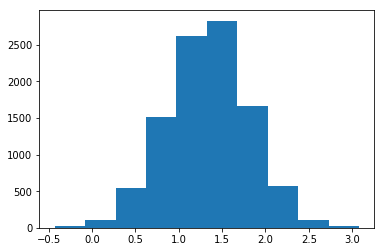

In [3]:
plt.hist(diffs);

In [4]:
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

(0.10258900080919674, 2.5388333707966284)

In [31]:
2.5388333707966284 - 0.10258900080919674

2.4362443699874317

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [14]:
diffs = []
for _ in range(10000):
    boo = sample_data.sample(200, replace=True)
    heights_older = boo.query('age==">=21"').height.mean()
    heights_youngBer = boo.query('age=="<21"').height.mean()
    diffs.append(heights_older - heights_younger)

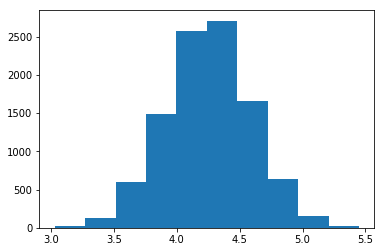

In [15]:
plt.hist(diffs);

In [16]:
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

(3.3464427236324648, 5.1126247168915251)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

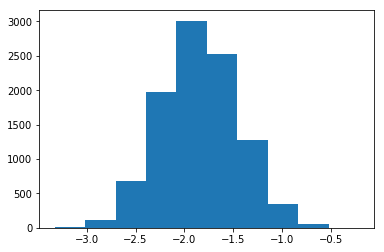

In [19]:
diffs=[]
for _ in range(10000):
    boo = sample_data.sample(200, replace=True)
    boo_younger = boo.query('age=="<21"')
    heights_drink = boo_younger.query('drinks_coffee==True').height.mean()
    heights_nodrink = boo_younger.query('drinks_coffee==False').height.mean()
    diffs.append(heights_drink - heights_nodrink)
    
plt.hist(diffs);

In [18]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(-2.6040886955333553, -1.0908927294310491)

In [30]:
-1.0908927294310491 - -2.6040886955333553 

1.5131959661023062

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [27]:
diffs = []
for _ in range(10000):
    boo = sample_data.sample(200, replace=True)
    boo_older = boo.query('age==">=21"')
    heights_drink = boo_older.query('drinks_coffee==True').height.mean()
    heights_nodrink = boo_older.query('drinks_coffee==False').height.mean()
    diffs.append(heights_drink - heights_nodrink)

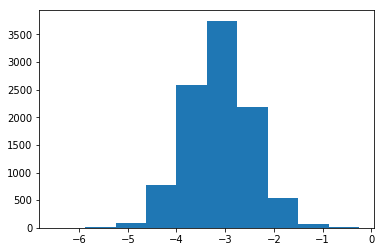

In [28]:
plt.hist(diffs);

In [29]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(-4.3801456069176377, -1.8112701857664479)

In [32]:
-1.8112701857664479 - -4.3801456069176377

2.5688754211511897

[Quiz 1]
- Based on the confidence interval in the first question, you have evidence that coffee drinkers are on average taller than non-coffee drinkers.
-> True

- In every bootstrapped instance in the first question, the difference in your averages suggested that coffee drinkers are on average taller than non-coffee drinkers.
-> False

- Based on the confidence interval in the second question, you have evidence that those older than 21 are on average taller than those younger than 21.
-> True

- In every bootstrapped instance in the second question, the difference in your averages suggested that those older than 21 are on average taller than those younger than 21.
-> True

[Quiz 2]
- The intervals in the last two  questions provide statistical evidence that on avereage coffee drinkers are shorter than non-coffee drinkers for both age ranges -> True
- The intervals in the last two parts are narrower than the interval from the first two parts -> True
- Though those older than 21 were on average shorter when drinking coffee, those younger than 21 were on average taller when drinking coffee. -> False

[Quiz 3]

in the first intervals, you had evidence that the average height of coffee drinkers was taller, but in the final intervals, you had evidence that coffee drinkers in each group were actually shorter. What was this an example of: 

Simpson's Paradox